In [1]:
import time
from selenium import webdriver
from PIL import Image as pil

In [6]:
!mkdir ./imgs

In [7]:
# 이미지 저장 함수
def save_imgs(youtube_url, times=10, term=3):
    driver = webdriver.Chrome()
    driver.get(youtube_url)
    filenames = []
    for sec in range(times):
        time.sleep(term)
        filename = './imgs/screenshot_{}.png'.format(sec)
        driver.save_screenshot(filename)
        filenames.append(filename)
    return driver, filenames

# 좌표 얻는 함수
def get_location(driver):
    element = driver.find_element_by_css_selector('#movie_player')
    location = element.location
    size = element.size
    left = location['x']
    top = location['y'] * 2
    right = left + size['width'] * 2
    bottom = top + size['height'] * 2
    return left, top, right, bottom

# 이미지 자르는 함수
def cut_img(filename, location):
    im = pil.open(filename)
    im = im.crop(location)
    im.save(filename)
    
# 메인 함수
def imgs_main(youtube_url, times=10, term=3):
    driver, filenames = save_imgs(youtube_url, times, term)
    location = get_location(driver)
    driver.quit()
    for filename in filenames:
        cut_img(filename, location)
    return filenames

In [8]:
youtube_url = "https://www.youtube.com/watch?v=F8wI5ZosdRA"
filenames = imgs_main(youtube_url)
len(filenames)

10

In [15]:
full_filenames = [path[0] + filename[1:] for filename in filenames]

In [10]:
from google.cloud import vision
from google.cloud.vision import types
import os, io

In [11]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/baek/Downloads/My Project 34948-2d4f892d5a16.json"

In [12]:
client = vision.ImageAnnotatorClient()
client

In [13]:
path = !pwd
path

['/Users/baek/Documents/Notebook/TIL']

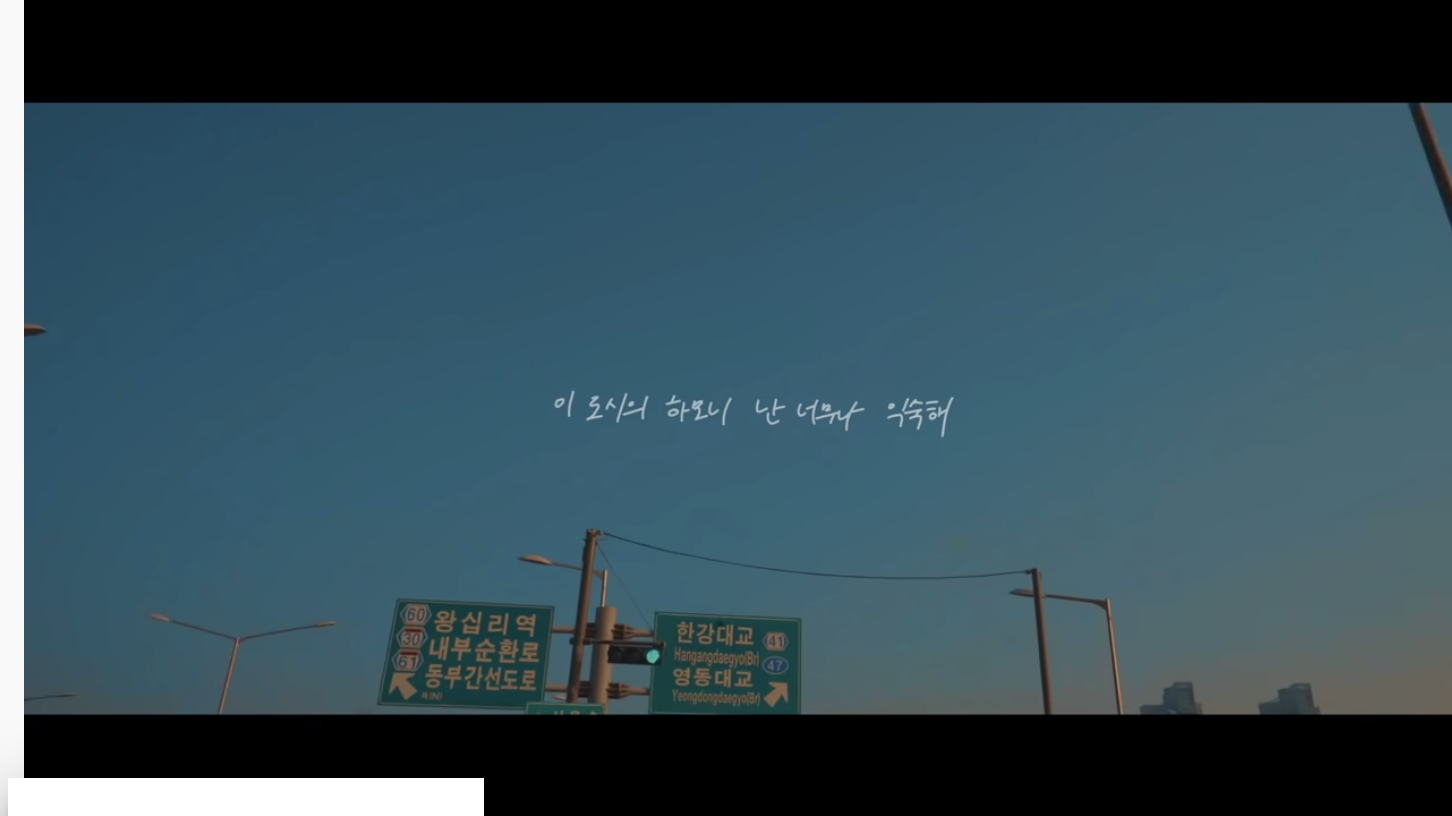

In [16]:
file_name = full_filenames[9]
pil.open(file_name)

In [18]:
with io.open(file_name, 'rb' ) as image_file:
    content = image_file.read()
    image = types.Image(content = content)

In [20]:
response = client.label_detection(image = image)

In [21]:
labels  = response.label_annotations
labels[:3]

[mid: "/m/01bqvp"
 description: "Sky"
 score: 0.9569038152694702
 topicality: 0.9569038152694702, mid: "/m/01ctsf"
 description: "Atmosphere"
 score: 0.7751701474189758
 topicality: 0.7751701474189758, mid: "/m/03scnj"
 description: "Line"
 score: 0.773042619228363
 topicality: 0.773042619228363]